<a href="https://colab.research.google.com/github/gregumo1987/MLA_GGM/blob/main/MLA3_GGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 3**  
## **Greg Gutierrez**
## **CS430**
## **Machine Learning in the Cloud** 
---

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models

In [3]:
# Import models.
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Statistical and Visual Exploration

In [9]:
# Summarize the numerical columns of data.
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Get the counts of forgery vs no forgery.

In [10]:
# Recharacterize forgery from numeric to text where '1' means forgery and '0' means no forgery.
df1 = df['forgery'].apply(lambda x: 'forgery' if x == 1 else 'no forgery') 
df1.head()
forgery_counts = df1.value_counts()
print(forgery_counts)

no forgery    762
forgery       610
Name: forgery, dtype: int64


### Create a barplot to view how many banknotes are forgeries and how many are not.

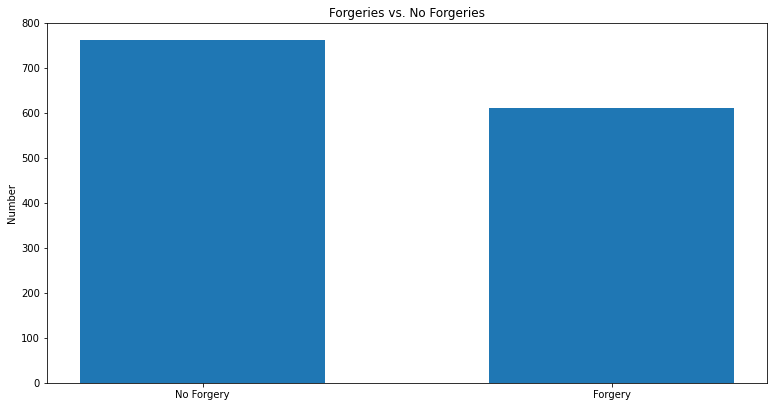

In [11]:
forgery = ['No Forgery', 'Forgery']
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Forgeries vs. No Forgeries')
ax.set_ylabel('Number')
ax.bar(forgery, forgery_counts, width=0.6)
plt.show()

### Create a pairplot of all of the numerical variables using Seaborn.

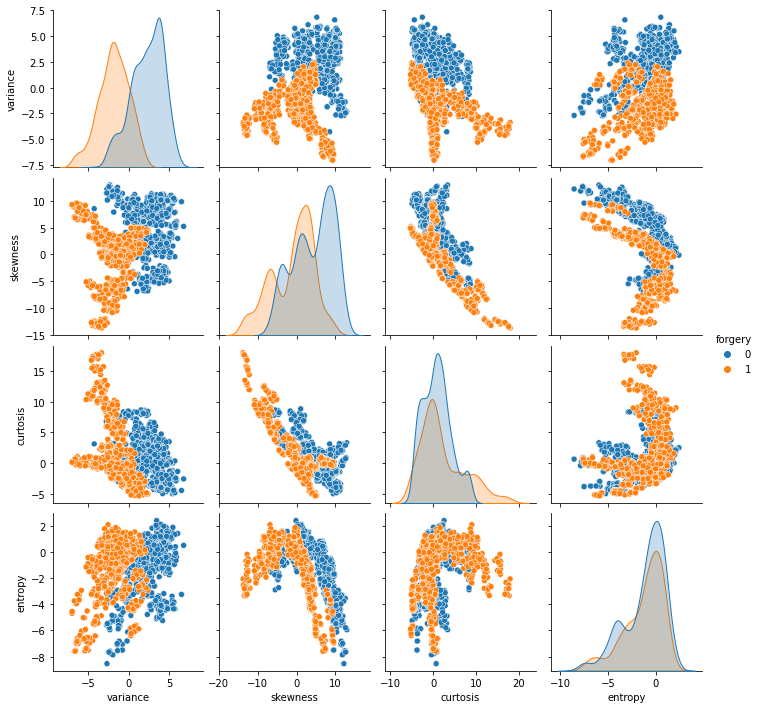

In [13]:
# Create a pairplot of all the numerical variables, color-coded by forgery. 
pp = sns.pairplot(df, hue='forgery')

### Observations from the pairplot.
There appears to be clustering of the data by forgery status and there appears to be a negative linear correlation between curtosis and skewness. The plots are also suggestive of a parabolic (quadratic) correlation between entropy and skewness and between entropy and curtosis. 

### Splitting Data into Train/Test

In [14]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']
#Split the data into Train/Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [15]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('svc_model', SVC(kernel='linear', C=1, max_iter=10000))
]) 
from sklearn import set_config
set_config(display='diagram')
pipeline 

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('svc_model', SVC(C=1, kernel='linear', max_iter=10000))])

### Executing the Model

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('svc_model', SVC(C=1, kernel='linear', max_iter=10000))])

### Evaluating Model

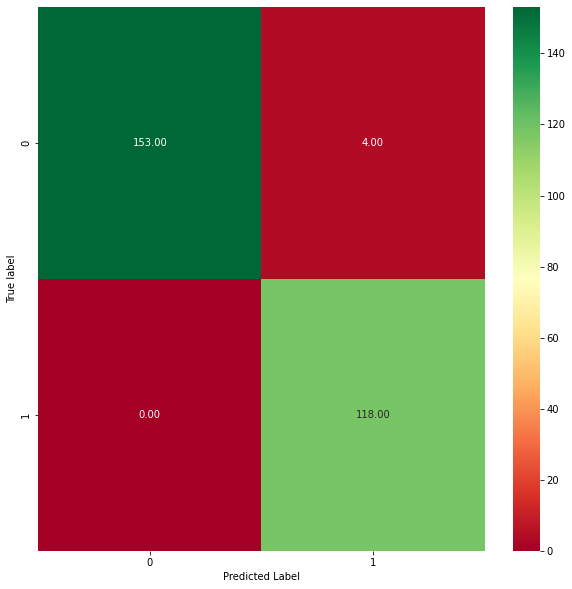

In [17]:
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Call the plot_cm function to generate the confusion matrix.
plot_cm(y_test, y_pred)

In [18]:
# Calculate the precision, recall, and F1 score. 
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision: 0.9672131147540983
Recall: 1.0
F1 score: 0.9833333333333333


### Interpretation of the results.
The confusion matrix shows that the model correctly detected 118 of 118 forgeries in the test data for a recall (sensitivity) of 100%. There were only 4 false postives for a precision of 118/(118 + 4) = 96.72%. The F1 score is also quite high for this model at 98.33%, and this would be expected given the high recall and precision. All performance measures indicate this to be an excellent model for predicting forgeries based on `variance`, `curtosis`, `skewness`, and `entropy`. 

## Problem 2

### Reading the Data

In [20]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [21]:
# Rename the columns.
df.rename(columns = {'Usage_kWh':'usage_kwh'},inplace=True)
df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'},inplace=True)
df.rename(columns = {'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'},inplace=True)
df.rename(columns = {'Lagging_Current_Power_Factor':'lag_current_pwr'},inplace=True)
df.rename(columns = {'Leading_Current_Power_Factor':'lead_current_pwr'},inplace=True)
df.rename(columns = {'NSM':'nsm'},inplace=True)
df.rename(columns = {'WeekStatus':'week_status'},inplace=True)
df.rename(columns = {'Day_of_week':'day_of_week'},inplace=True)
df.rename(columns = {'Load_Type':'load_type'},inplace=True)

### Splitting Data into Train/Test

In [22]:
X = df.loc[:,'lag_react_pwr_kvarh':'load_type']
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [23]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']
col_transform = ColumnTransformer(transformers=[
                 ('cat', OneHotEncoder(), cat_attribs),
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('svr_model', SVR(kernel='linear', C=1, max_iter=100000, epsilon=0.0))
]) 
from sklearn import set_config
set_config(display='diagram')
pipeline  

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('svr_model',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=100000))])

### Executing the Model

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('svr_model',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=100000))])

### Evaluating Model

In [25]:
# Make predictions on the training data.
y_train_pred = pipeline.predict(X_train)
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Get the root mean square errors for both 
RMSE_train = (mean_squared_error(y_train, y_train_pred))**.5
RMSE_test = (mean_squared_error(y_test, y_pred))**.5
print('RMSE_train =',RMSE_train,'  RMSE_test =',RMSE_test)

RMSE_train = 4.638666209940008   RMSE_test = 5.139876825913361


The RMSE values obtained here with SVR using a linear kernel are very close to those that were obtained in a previous assignment with linear regression. (Results for the linear regression model were: RMSE_train = 4.638666209940008,    RMSE_test = 5.139876825913361). This is possibly not surprising since both approaches used a linear model. The RMSE for the test data in both cases is higher than the RMSE for the train data suggesting some degree of overfitting. 

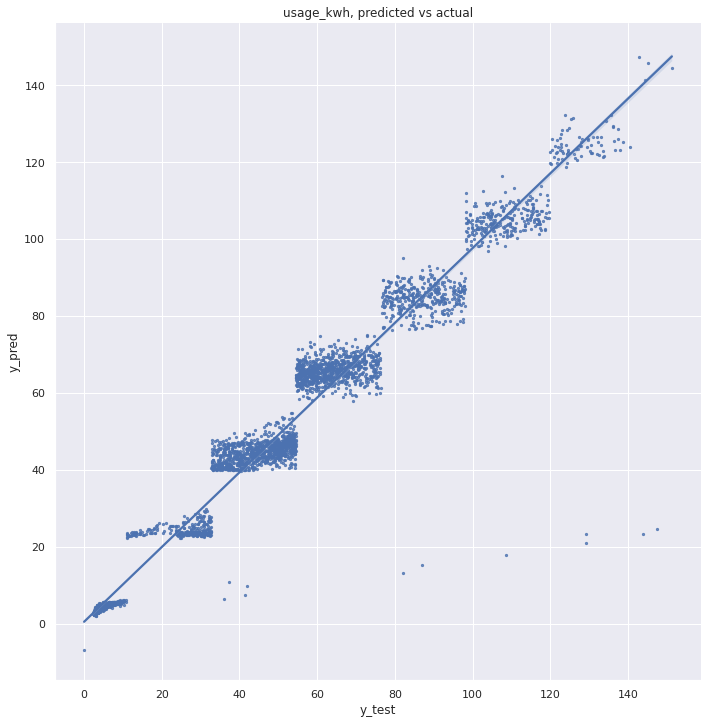

In [26]:
# Plot predicted vs actual
data = {'y_test': y_test, 'y_pred': y_pred}
df2 = pd.DataFrame(data)
sns.set(rc = {'figure.figsize':(50,50)})
sns.lmplot(x='y_test', y='y_pred', data=df2, height=10, aspect=1, scatter_kws={"s": 5}).set(title='usage_kwh, predicted vs actual')
plt.show()

### Conclusion
The performance of this SVR model using a linear kernel is essentially the same as the performance seen with linear regression in a previous assignment. Plotting the predicted vs actual kwh usage for this model shows the same segmentation pattern and outliers that were seen with the linear regression model. Even though the magnitudes of the RMSE's for these models are probably acceptable, the segmentation is suggestive of overfitting, raising concerns about the degree of generalization error that could be seen with out of sample data. Thus, these models would need improving before they could be considered suitable for predicting kwh usage. (Improvements were discussed and demonstrated in the previous assignment.) 